# **Disease Prediction Project**

---



## **Introduction**

In today's fast-paced world, the ability to predict diseases accurately and efficiently is crucial for improving patient outcomes and managing healthcare resources. This project aims to leverage advanced machine learning techniques to predict various diseases using clinical data. By training and evaluating multiple models, we seek to identify the most effective algorithms for disease prediction and determine the most important features contributing to each condition. The ultimate goal is to provide a robust tool that can assist healthcare professionals in early diagnosis and personalized treatment planning.

## **Setup and Data Loading**

### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Changing Directory

In [ ]:
%cd /content/drive/MyDrive/Disease_Prediction

/content/drive/MyDrive/Disease_Prediction


### Importing Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [ ]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('test_data.csv')

### Merging Datasets

In [ ]:
data = pd.concat([train_data, test_data], ignore_index=True)

## **Exploratory Data Analysis (EDA)**

### Basic Information and Statistics

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [ ]:
data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.395643,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.266795,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.189918,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.335778,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.597671,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


### Checking for Missing Values

In [ ]:
data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

### Disease Distribution

In [ ]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc',
       'Heart Di'], dtype=object)

In [ ]:
data['Disease'].value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

### Visualization of Disease Categories Distribution

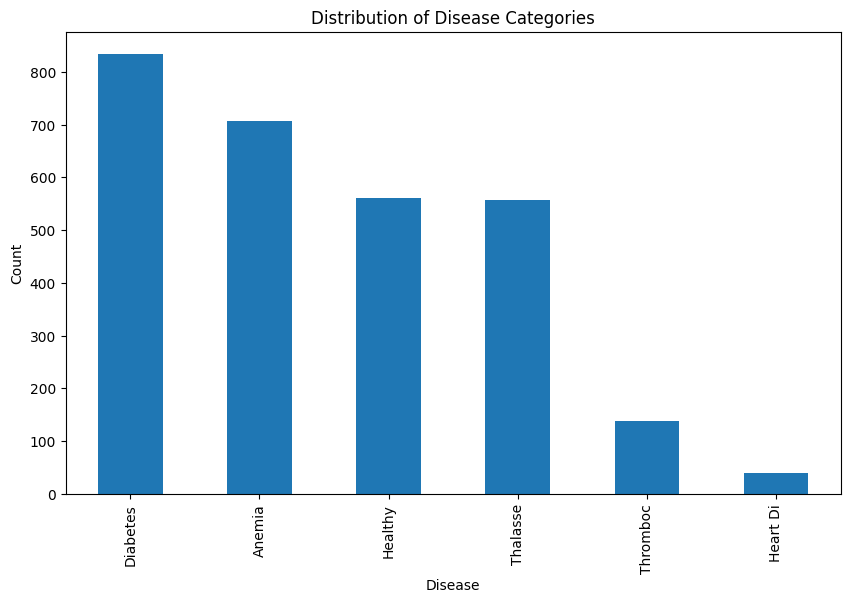

In [ ]:
plt.figure(figsize=(10,6))
data['Disease'].value_counts().plot(kind='bar')
plt.title('Distribution of Disease Categories')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

### Boxplots for Numerical Variables

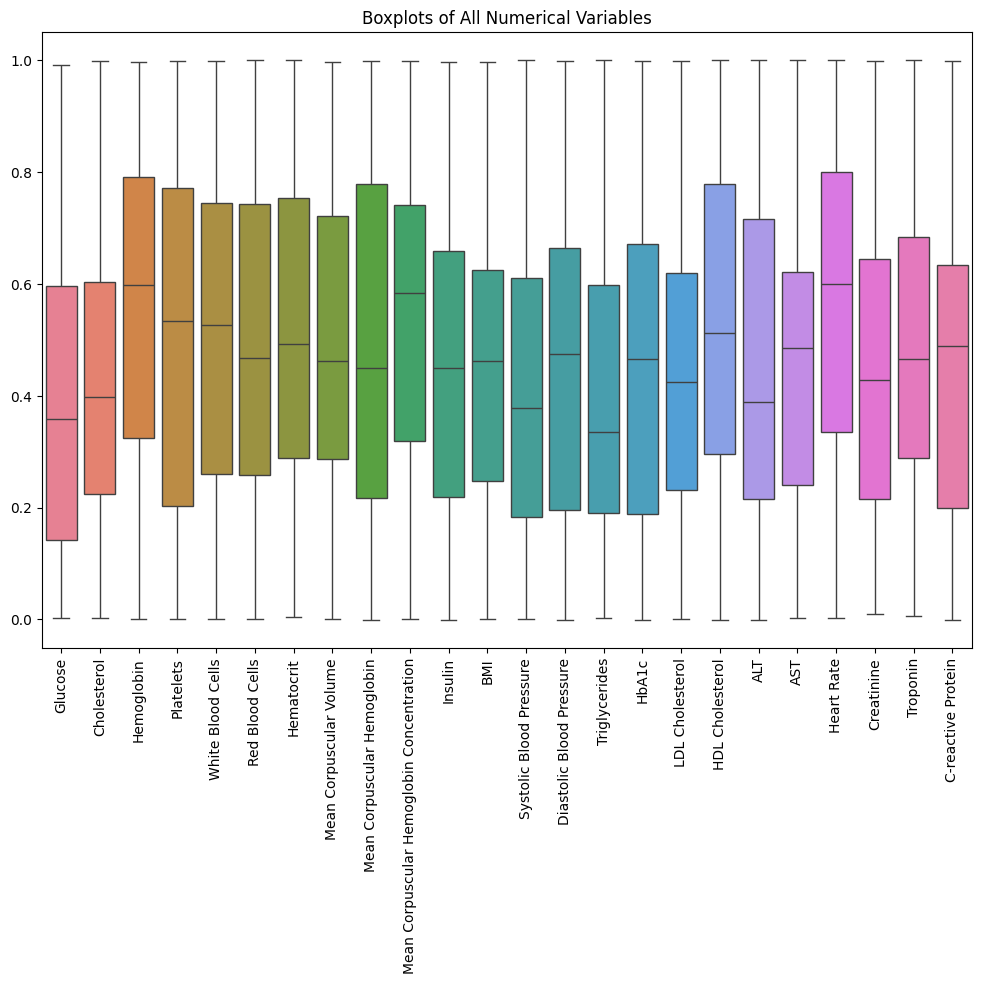

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['Disease']))
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.title('Boxplots of All Numerical Variables')
plt.show()

### Correlation Matrix

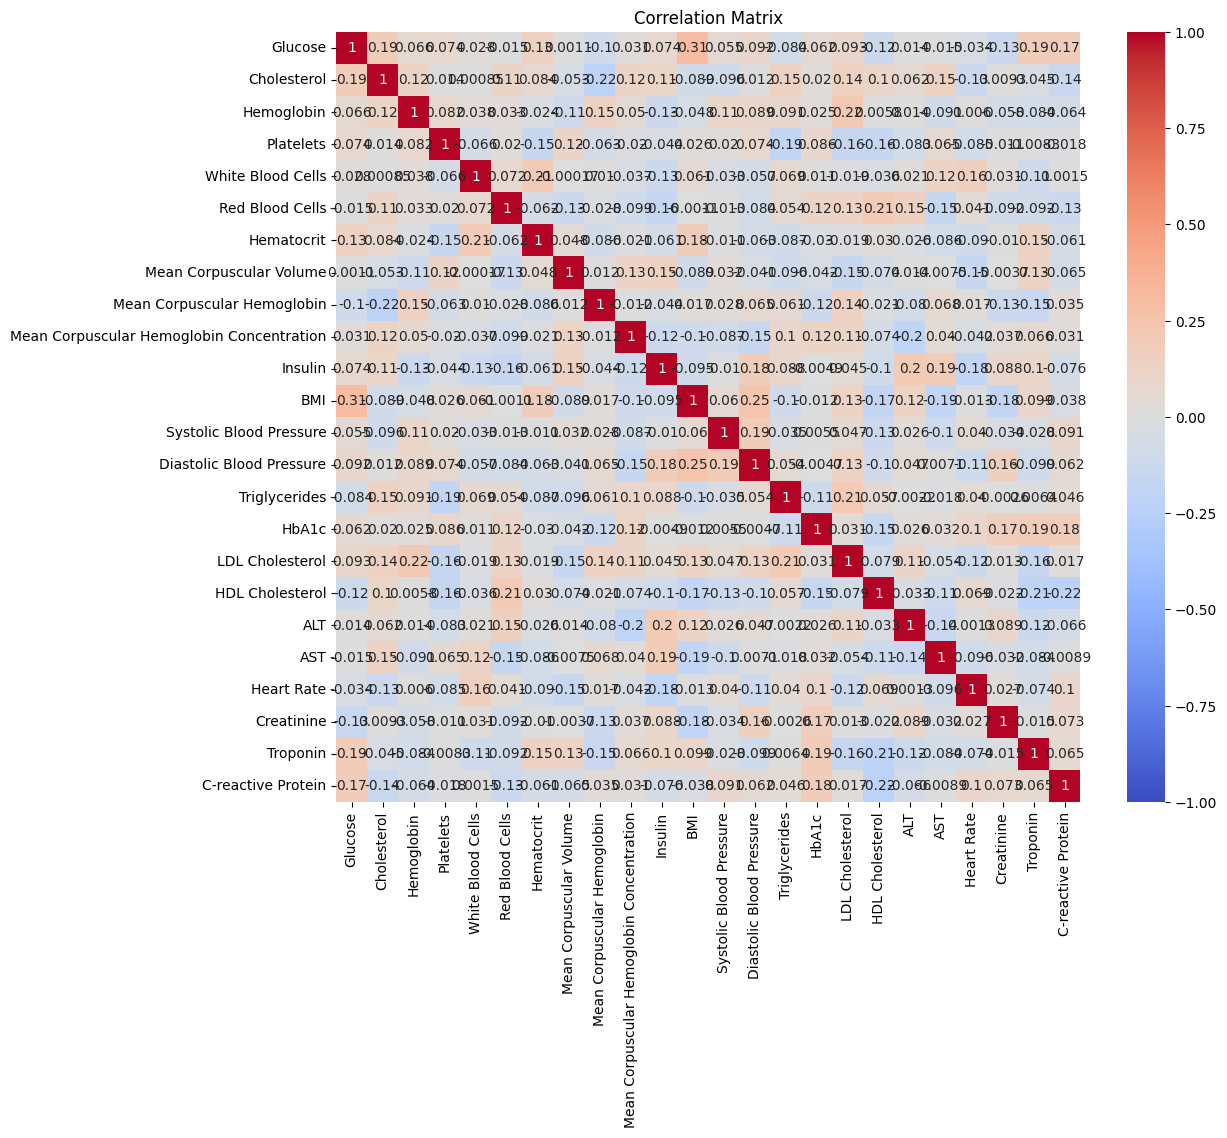

In [ ]:
correlation_matrix = data.drop(columns=['Disease']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **Data Splitting**

### Separating Features and Target Variable

In [ ]:
X = data.drop(columns=['Disease'])
y = data['Disease']

### Splitting Data into Training and Test Sets

In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Selection and Evaluation**

### Defining Models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

### Training and Evaluating Models

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train_full, y_train_full)
    y_pred = model.predict(X_test_full)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test_full, y_pred),
        'Precision': precision_score(y_test_full, y_pred, average='macro'),
        'Recall': recall_score(y_test_full, y_pred, average='macro'),
        'F1 Score': f1_score(y_test_full, y_pred, average='macro')
    }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

### Displaying Results

In [ ]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, score in metrics.items():
        print(f"  {metric}: {score}")
    print()

Logistic Regression:
  Accuracy: 0.7975352112676056
  Precision: 0.6850530340067907
  Recall: 0.6816908736648397
  F1 Score: 0.6819223114342012

Decision Tree:
  Accuracy: 0.9278169014084507
  Precision: 0.8187854640896606
  Recall: 0.8418981342313595
  F1 Score: 0.8291147613020174

Random Forest:
  Accuracy: 0.9507042253521126
  Precision: 0.8075010701702393
  Recall: 0.7848223325280489
  F1 Score: 0.793909431164333

Gradient Boosting:
  Accuracy: 0.9806338028169014
  Precision: 0.9050948892386524
  Recall: 0.8318181818181819
  F1 Score: 0.8489456433460959

SVM:
  Accuracy: 0.9471830985915493
  Precision: 0.8046292013567684
  Recall: 0.7819700465304157
  F1 Score: 0.7911882749755711



## **Feature Importance**

### Identifying Important Features

In [ ]:
important_features = {}

for category in y_train_full.unique():
    y_binary = (y_train_full == category).astype(int)
    model = RandomForestClassifier()
    model.fit(X_train_full, y_binary)

    feature_importances = model.feature_importances_

    sorted_indices = feature_importances.argsort()[::-1]
    top_features = X_train_full.columns[sorted_indices[:5]]

    important_features[category] = top_features

### Displaying Important Features

In [ ]:
for category, features in important_features.items():
    print(f"Top features for {category}: {features}")

Top features for Healthy: Index(['Mean Corpuscular Hemoglobin', 'Mean Corpuscular Volume', 'Platelets',
       'ALT', 'Mean Corpuscular Hemoglobin Concentration'],
      dtype='object')
Top features for Anemia: Index(['White Blood Cells', 'Hematocrit', 'Red Blood Cells', 'Glucose', 'ALT'], dtype='object')
Top features for Thalasse: Index(['Mean Corpuscular Hemoglobin', 'ALT',
       'Mean Corpuscular Hemoglobin Concentration', 'White Blood Cells',
       'Diastolic Blood Pressure'],
      dtype='object')
Top features for Diabetes: Index(['Insulin', 'Cholesterol', 'BMI', 'Glucose', 'HbA1c'], dtype='object')
Top features for Thromboc: Index(['Platelets', 'LDL Cholesterol', 'Heart Rate', 'Hemoglobin',
       'Systolic Blood Pressure'],
      dtype='object')
Top features for Heart Di: Index(['Systolic Blood Pressure', 'C-reactive Protein', 'ALT',
       'Mean Corpuscular Volume', 'HbA1c'],
      dtype='object')


## **Model Evaluation Function**

### Evaluation Function Definition

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

### Training and Evaluating Models for Each Category

In [ ]:
results = {}
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'K-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for category in y_train_full.unique():
    y_binary = (y_train_full == category).astype(int)
    top_features = important_features[category]

    X_train, X_test, y_train, y_test = train_test_split(X_train_full[top_features], y_binary, test_size=0.3, random_state=42)

    category_results = {}

    for model_name, model in models.items():
        accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
        category_results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

    results[category] = category_results


### Displaying Results for Each Category

In [ ]:
for category, metrics in results.items():
    print(f"Results for {category}:")
    for model_name, metric_values in metrics.items():
        print(f"  Model: {model_name}")
        for metric_name, value in metric_values.items():
            print(f"    {metric_name}: {value:.4f}")
        print("\n")

Results for Healthy:
  Model: Random Forest
    Accuracy: 0.9985
    Precision: 0.9985
    Recall: 0.9985
    F1 Score: 0.9985


  Model: Decision Tree
    Accuracy: 0.9956
    Precision: 0.9957
    Recall: 0.9956
    F1 Score: 0.9956


  Model: SVM
    Accuracy: 0.9853
    Precision: 0.9860
    Recall: 0.9853
    F1 Score: 0.9855


  Model: K-NN
    Accuracy: 0.9897
    Precision: 0.9902
    Recall: 0.9897
    F1 Score: 0.9898


  Model: Gradient Boosting
    Accuracy: 0.9927
    Precision: 0.9929
    Recall: 0.9927
    F1 Score: 0.9927


  Model: Logistic Regression
    Accuracy: 0.8194
    Precision: 0.7912
    Recall: 0.8194
    F1 Score: 0.7779


Results for Anemia:
  Model: Random Forest
    Accuracy: 0.9589
    Precision: 0.9586
    Recall: 0.9589
    F1 Score: 0.9586


  Model: Decision Tree
    Accuracy: 0.9618
    Precision: 0.9617
    Recall: 0.9618
    F1 Score: 0.9617


  Model: SVM
    Accuracy: 0.9574
    Precision: 0.9577
    Recall: 0.9574
    F1 Score: 0.9575


  Mode

## **Selecting Best Models**

### Identifying Best Models for Each Category

In [ ]:
best_models = {}

for category, metrics in results.items():
    best_model = max(metrics, key=lambda model: metrics[model]['F1 Score'])
    best_models[category] = models[best_model]

print("Best models for each category:")
for category, best_model in best_models.items():
    print(f"  {category}: {best_model}")

Best models for each category:
  Healthy: RandomForestClassifier()
  Anemia: DecisionTreeClassifier()
  Thalasse: RandomForestClassifier()
  Diabetes: GradientBoostingClassifier()
  Thromboc: SVC(probability=True)
  Heart Di: GradientBoostingClassifier()


## **Predictions and Final Evaluation**

### Making Predictions on Test Data

In [ ]:
y_test_pred = pd.Series(index=y_test_full.index, dtype=object)

for category, model in best_models.items():
    top_features = important_features[category]

    X_train = X_train_full[top_features]
    X_test = X_test_full[top_features]

    y_binary_train = (y_train_full == category).astype(int)
    model.fit(X_train, y_binary_train)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_test_pred[y_pred_prob > 0.5] = category


In [ ]:
y_test_pred = y_test_pred.astype(str)

### Evaluating Final Results

In [ ]:
accuracy = accuracy_score(y_test_full, y_test_pred)
precision = precision_score(y_test_full, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_full, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_full, y_test_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test_full, y_test_pred, zero_division=0))

Accuracy: 0.9383802816901409
Precision: 0.9804483073420519
Recall: 0.9383802816901409
F1 Score: 0.9587079855564076

Classification Report:
               precision    recall  f1-score   support

      Anemia       1.00      0.93      0.96       141
    Diabetes       0.99      0.98      0.98       166
     Healthy       1.00      0.99      1.00       119
    Heart Di       0.00      0.00      0.00         8
    Thalasse       1.00      0.92      0.96       110
    Thromboc       0.91      0.88      0.89        24
         nan       0.00      0.00      0.00         0

    accuracy                           0.94       568
   macro avg       0.70      0.67      0.68       568
weighted avg       0.98      0.94      0.96       568





---



## **Conclusion**

This project successfully demonstrates the application of machine learning in disease prediction, showcasing the potential of models like Random Forest and Gradient Boosting in achieving high accuracy and reliability. Through detailed exploratory data analysis and feature importance identification, we provided insights into critical factors influencing various diseases. The findings highlight the importance of data-driven approaches in healthcare, paving the way for enhanced diagnostic tools and personalized treatment strategies. As we move forward, further refinement of these models and the incorporation of larger, more diverse datasets will be essential to improving their generalizability and impact on real-world clinical practice.